In [1]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('us-accidents-analysis')
jovian.set_colab_id('10ecIqxF82WAeGBYayxnpts4iqO57FSGX')

# ***Exploratory Data Analysis of US Accidents***

- The dataset has been downloaded from `kaggle.com` which contains around `1.5 million` records.
- It contains information about the accidents that have taken place in US and can be helpful to prevent accidents in future.
- Link to download the dataset - https://www.kaggle.com/sobhanmoosavi/us-accidents

## Downloading the Dataset

In [2]:
pip install opendatasets --upgrade --quiet

In [3]:
import opendatasets as od

In [4]:
download_url = 'https://www.kaggle.com/sobhanmoosavi/us-accidents'

od.download(download_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: rushabhgajjar
Your Kaggle Key: ··········


100%|██████████| 117M/117M [00:00<00:00, 131MB/s]


In [5]:
data_filename = './us-accidents/US_Accidents_Dec20_updated.csv'

## Data Preparation & Cleaning

1. Load the file using Pandas
2. Look at some information about the data & columns.
3. Fix any missing or incorrect values about the data

In [6]:
import pandas as pd

In [7]:
# Load dataset into a dataframe
df = pd.read_csv(data_filename)

In [8]:
df

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2716600,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,NaN,Outerbelt E,R,Dublin,Franklin,OH,43017,US,US/Eastern,KOSU,2016-02-08 00:53:00,42.1,36.1,58.0,29.76,10.0,SW,10.4,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2716601,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,0.747,At OH-4/OH-235/Exit 41 - Accident.,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
2,A-2716602,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10266,-84.52468,39.10209,-84.52396,0.055,At I-71/US-50/Exit 1 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45203,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day
3,A-2716603,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10148,-84.52341,39.09841,-84.52241,0.219,At I-71/US-50/Exit 1 - Accident.,NaN,US-50 E,R,Cincinnati,Hamilton,OH,45202,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day
4,A-2716604,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.06213,-81.53784,41.06217,-81.53547,0.123,At Dart Ave/Exit 21 - Accident.,NaN,I-77 N,R,Akron,Summit,OH,44311,US,US/Eastern,KAKR,2016-02-08 06:54:00,39.0,NaN,55.0,29.65,10.0,Calm,NaN,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1516059,A-4239402,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.00248,-117.37936,33.99888,-117.37094,0.543,At Market St - Accident.,NaN,Pomona Fwy E,R,Riverside,Riverside,CA,92501,US,US/Pacific,KRAL,2019-08-23 17:53:00,86.0,86.0,40.0,28.92,10.0,W,13.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
1516060,A-4239403,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.76696,-117.14806,32.76555,-117.15363,0.338,At Camino Del Rio/Mission Center Rd - Accident.,NaN,I-8 W,R,San Diego,San Diego,CA,92108,US,US/Pacific,KMYF,2019-08-23 18:53:00,70.0,70.0,73.0,29.39,10.0,SW,6.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
1516061,A-4239404,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.77545,-117.84779,33.77740,-117.85727,0.561,At Glassell St/Grand Ave - Accident. in the ri...,NaN,Garden Grove Fwy,R,Orange,Orange,CA,92866,US,US/Pacific,KSNA,2019-08-23 18:53:00,73.0,73.0,64.0,29.74,10.0,SSW,10.0,0.00,Partly Cloudy,False,False,False,False,True,False,False,False,False,False,False,False,False,Day,Day,Day,Day
1516062,A-4239405,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.99246,-118.40302,33.98311,-118.39565,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,NaN,San Diego Fwy S,R,Culver City,Los Angeles,CA,90230,US,US/Pacific,KSMO,2019-08-23 18:51:00,71.0,71.0,81.0,29.62,10.0,SW,8.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,False,F

In [9]:
# Check number of rows and columns
df.shape

(1516064, 47)

As we can see the dataset contains `1516064` rows and `47` columns.

In [10]:
# Check column names
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [11]:
# Check datatype and non-null values of each columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1516064 entries, 0 to 1516063
Data columns (total 47 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   ID                     1516064 non-null  object 
 1   Severity               1516064 non-null  int64  
 2   Start_Time             1516064 non-null  object 
 3   End_Time               1516064 non-null  object 
 4   Start_Lat              1516064 non-null  float64
 5   Start_Lng              1516064 non-null  float64
 6   End_Lat                1516064 non-null  float64
 7   End_Lng                1516064 non-null  float64
 8   Distance(mi)           1516064 non-null  float64
 9   Description            1516064 non-null  object 
 10  Number                 469969 non-null   float64
 11  Street                 1516064 non-null  object 
 12  Side                   1516064 non-null  object 
 13  City                   1515981 non-null  object 
 14  County            

In [12]:
# Checking basic statistics
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,1.516064e+06,1.516064e+06,1.516064e+06,1.516064e+06,1.516064e+06,1.516064e+06,4.699690e+05,1.473031e+06,1.066748e+06,1.470555e+06,1.479790e+06,1.471853e+06,1.387202e+06,1.005515e+06
mean,2.238630e+00,3.690056e+01,-9.859919e+01,3.690061e+01,-9.859901e+01,5.872617e-01,8.907533e+03,5.958460e+01,5.510976e+01,6.465960e+01,2.955495e+01,9.131755e+00,7.630812e+00,8.477855e-03
std,6.081481e-01,5.165653e+00,1.849602e+01,5.165629e+00,1.849590e+01,1.632659e+00,2.242190e+04,1.827316e+01,2.112735e+01,2.325986e+01,1.016756e+00,2.889112e+00,5.637364e+00,1.293168e-01
min,1.000000e+00,2.457022e+01,-1.244976e+02,2.457011e+01,-1.244978e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.385422e+01,-1.182076e+02,3.385420e+01,-1.182077e+02,0.000000e+00,1.212000e+03,4.700000e+01,4.080000e+01,4.800000e+01,2.944000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.735113e+01,-9.438100e+01,3.735134e+01,-9.437987e+01,1.780000e-01,4.000000e+03,6.100000e+01,5.700000e+01,6.800000e+01,2.988000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.072593e+01,-8.087469e+01,4.072593e+01,-8.087449e+01,5.940000e-01,1.010000e+04,7.300000e+01,7.100000e+01,8.400000e+01,3.004000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.706000e+02,1.130000e+02,1.000000e+02,5.804000e+01,1.400000e+02,9.840000e+02,2.400000e+01


In [13]:
# Check number of numeric columns 

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_df = df.select_dtypes(include=numerics)
len(numeric_df.columns)

14

We have `14` numeric columns.

In [14]:
# Count percentage of missing values
missing_percentages = df.isna().sum().sort_values(ascending=False) / len(df) * 100
missing_percentages

Number                   69.000715
Precipitation(in)        33.675953
Wind_Chill(F)            29.637007
Wind_Speed(mph)           8.499773
Humidity(%)               3.001786
Visibility(mi)            2.916170
Weather_Condition         2.902714
Temperature(F)            2.838469
Wind_Direction            2.760965
Pressure(in)              2.392643
Weather_Timestamp         1.996222
Airport_Code              0.280199
Timezone                  0.151841
Zipcode                   0.061673
City                      0.005475
Nautical_Twilight         0.005475
Astronomical_Twilight     0.005475
Civil_Twilight            0.005475
Sunrise_Sunset            0.005475
Amenity                   0.000000
Bump                      0.000000
Severity                  0.000000
Start_Time                0.000000
End_Time                  0.000000
Start_Lat                 0.000000
Start_Lng                 0.000000
End_Lat                   0.000000
End_Lng                   0.000000
Distance(mi)        

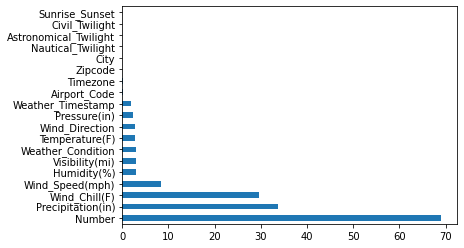

In [15]:
missing_percentages[missing_percentages != 0].plot(kind='barh');

As we can see the `Number` column values are missing for around `69%`. Hence it will be of no use for analysis. So we can drop this column.

In [16]:
df.drop(['Number'], axis=1, inplace=True)

## Exploratory Analysis & Visualization

Columns we'll analyse:
1. State
2. City
3. Start lat/ Start lng
4. Wind speed

In [17]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Street', 'Side',
       'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

### State

In [18]:
df.State

0          OH
1          OH
2          OH
3          OH
4          OH
           ..
1516059    CA
1516060    CA
1516061    CA
1516062    CA
1516063    CA
Name: State, Length: 1516064, dtype: object

Which 5 states have the highest number of accidents?

In [19]:
high_accident_states = df.State.value_counts().head(5)
high_accident_states

CA    448833
FL    153007
OR     87484
TX     75142
NY     60974
Name: State, dtype: int64

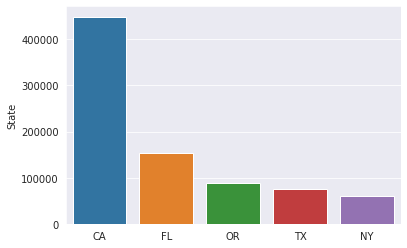

In [20]:
import seaborn as sns
sns.set_style('darkgrid')
sns.barplot(x=high_accident_states.index, y=high_accident_states);

The top 3 States with highest number of accidents are `California`, `Florida` and `Oregon` with `4,48,833`, `1,53,007` and `87,484` accidents. This is then followed by `Texas` and `New York`.

### City

In [21]:
df.City

0               Dublin
1               Dayton
2           Cincinnati
3           Cincinnati
4                Akron
              ...     
1516059      Riverside
1516060      San Diego
1516061         Orange
1516062    Culver City
1516063       Highland
Name: City, Length: 1516064, dtype: object

In [22]:
cities = df.City.unique()
len(cities)

10658

There are total `10658` cities.

In [23]:
cities_by_accidents = df.City.value_counts()
cities_by_accidents[:20]

Los Angeles     39984
Miami           36233
Charlotte       22203
Houston         20843
Dallas          19497
Sacramento      18431
Orlando         16169
Portland        14805
San Diego       14090
Minneapolis     12653
Atlanta         11854
Chicago         11507
Saint Paul      10084
Phoenix          9934
Raleigh          9516
San Jose         9362
Richmond         8472
Nashville        8381
Riverside        8201
Jacksonville     7815
Name: City, dtype: int64

Which are the top 20 cities with highest number of accidents?

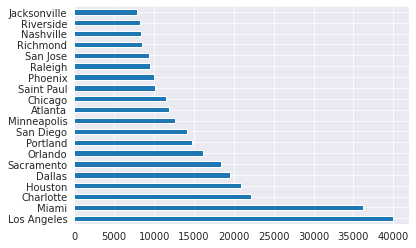

In [24]:
# 20 cities with highest accidents
cities_by_accidents[:20].plot(kind='barh');

As we can see that `Los Angeles`, `Miami`, `Charlotte`, `Houston` and `Dallas` are the top 5 cities with highest number of accidents.

In what range is the maximum number of accidents?

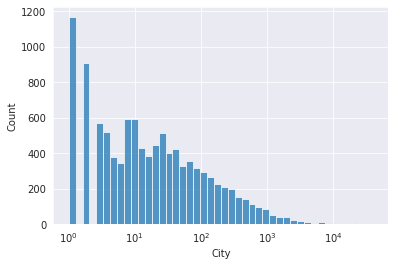

In [25]:
sns.histplot(cities_by_accidents, log_scale=True);

As we can see a lot of the cities have accident numbers from `0` to `10`. Maybe this could indicate that there is missing data for these cities.

Major chunk of the data is between `10` to `100` accidents.

In [26]:
high_accident_cities = cities_by_accidents[cities_by_accidents >= 1000]
low_accident_cities = cities_by_accidents[cities_by_accidents < 1000]

In [27]:
len(high_accident_cities) / len(cities) * 100

2.3550384687558643

In [28]:
len(high_accident_cities)

251

As we can see less than `3%` of the total cities i.e `251` out of `10658` have more than `1000` accidents.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


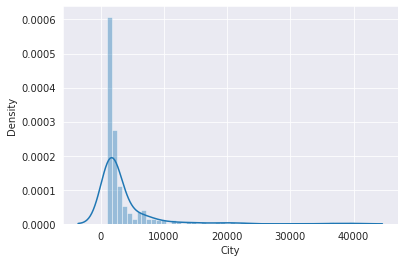

In [29]:
sns.distplot(high_accident_cities);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


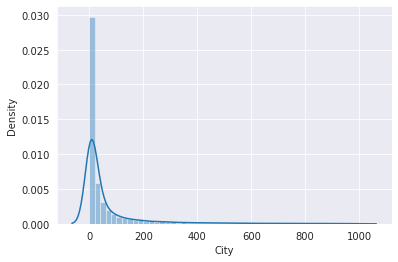

In [30]:
sns.distplot(low_accident_cities);

In [31]:
cities_by_accidents[cities_by_accidents == 1]

Center Harbor     1
Davis Junction    1
Hosston           1
Deputy            1
Spring Bay        1
                 ..
Arverne           1
Henry             1
Indian Valley     1
Walnut Hills      1
Killen            1
Name: City, Length: 1167, dtype: int64

Only `1` accident is reported in `1167` cities.

### Start Time

In [32]:
df.Start_Time[0]

'2016-02-08 00:37:08'

In [33]:
# Parse to datetime datatype
df.Start_Time = pd.to_datetime(df.Start_Time)

In [34]:
df.Start_Time[0]

Timestamp('2016-02-08 00:37:08')

What time of the day are accidents most frequent in?

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


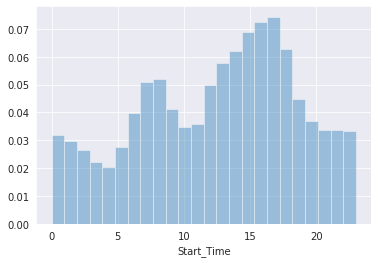

In [35]:
# Time of the day for most frequent accidents
sns.distplot(df.Start_Time.dt.hour, bins=24, kde=False, norm_hist=True);

A high percentage of accidents occur between `3 PM` to `6 PM` and `6 AM` to `8 AM` which could probably be due to people commuting to work & home.

Which days of the week have the most accidents?

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


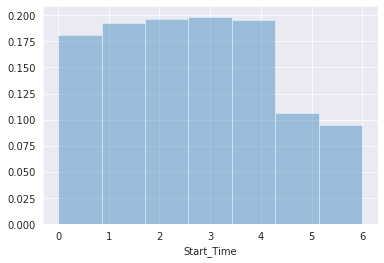

In [36]:
# Days of week with most accidents
sns.distplot(df.Start_Time.dt.dayofweek, bins=7, kde=False, norm_hist=True);

As we can see `X-axis` represents the the days from `monday` to `sunday` where `0` is monday and goes upto `6` as `sunday`.

The number of accidents are less on `weekend` compared to `weekdays`. 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


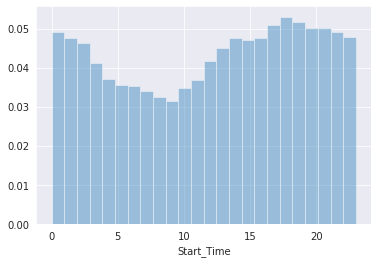

In [37]:
# Sunday accident distribution
sundays_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 6]
sns.distplot(sundays_start_time.dt.hour, bins=24, kde=False, norm_hist=True);

On sundays the peak accidents occur between `3 PM` till end of the day and another window for accidents is during midnight from `12 AM` to `2 AM`. 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


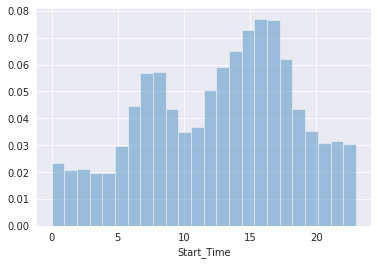

In [38]:
# Monday accident distribution
mondays_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 0]
sns.distplot(mondays_start_time.dt.hour, bins=24, kde=False, norm_hist=True);

On Mondays the accidents occur from `7 AM` to `8 AM` and `3 PM` to `6 PM` which are normally commuting hours for leaving office & homes.

Which months have the most accidents?

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


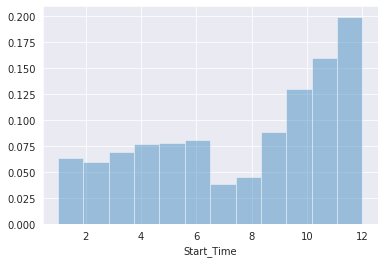

In [39]:
# Accidents by month
sns.distplot(df.Start_Time.dt.month, bins=12, kde=False, norm_hist=True);

As we can see the number of accidents in less intially in the starting months but it then peaks in the final quarter from `September` to `December`, `December` being the highest.

Also we have data from `Febraury 2016`, hence data for `January 2016` is missed so there could be more addition in the starting months.

What is the trend of accidents year over year (decreasing/increasing)?

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


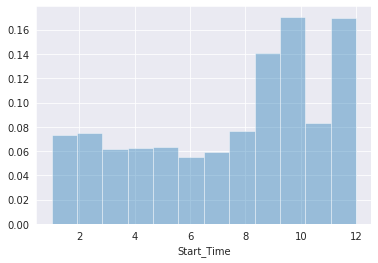

In [40]:
#  Accidents in year 2019
df_2019 = df[df.Start_Time.dt.year == 2019]
sns.distplot(df_2019.Start_Time.dt.month, bins=12, kde=False, norm_hist=True);

Same pattern is followed in year `2019` with `December` showing highest number of accidents.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


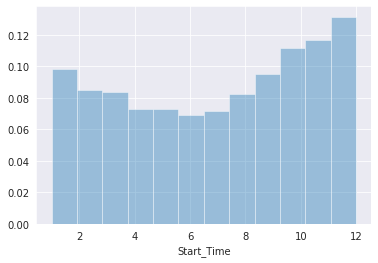

In [41]:
#  Accidents in year 2018
df_2018 = df[df.Start_Time.dt.year == 2018]
sns.distplot(df_2018.Start_Time.dt.month, bins=12, kde=False, norm_hist=True);

In year `2018` the number of accidents is quiet `balanced` throughout the year.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


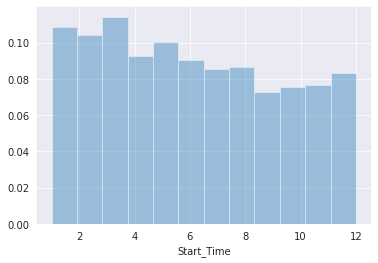

In [42]:
#  Accidents in year 2017
df_2017 = df[df.Start_Time.dt.year == 2017]
sns.distplot(df_2017.Start_Time.dt.month, bins=12, kde=False, norm_hist=True);

In year `2017` the number of accidents are more in the first quarter with a slight `decrease` in the final quarter.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


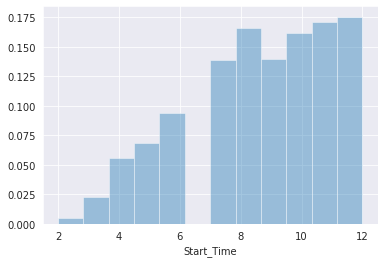

In [43]:
#  Accidents in year 2016
df_2016 = df[df.Start_Time.dt.year == 2016]
sns.distplot(df_2016.Start_Time.dt.month, bins=12, kde=False, norm_hist=True);

In year `2016` there are less number of accidents in the first quarter as the data is not collected for `January 2016` which could impact the total accidents in for first quarter from year `2016 to 2019`. 

Cities who have reported just `1` accident could also play a big part. 

There could also be a possibility that the systems fro collecting the data would have just set up in `2016` due to which a lot of data could have been missed.

When do most of accidents occur? Day/Night?

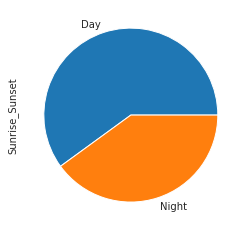

In [44]:
# Accidents based on Day & Night
df.Sunrise_Sunset.value_counts().plot(kind='pie');

### Start Latitude & Start Longitude

In [45]:
df.Start_Lat

0          40.10891
1          39.86542
2          39.10266
3          39.10148
4          41.06213
             ...   
1516059    34.00248
1516060    32.76696
1516061    33.77545
1516062    33.99246
1516063    34.13393
Name: Start_Lat, Length: 1516064, dtype: float64

In [46]:
df.Start_Lng

0          -83.09286
1          -84.06280
2          -84.52468
3          -84.52341
4          -81.53784
             ...    
1516059   -117.37936
1516060   -117.14806
1516061   -117.84779
1516062   -118.40302
1516063   -117.23092
Name: Start_Lng, Length: 1516064, dtype: float64

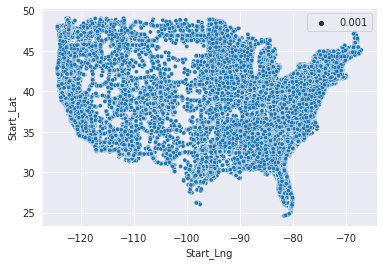

In [47]:
sns.scatterplot(x=df.Start_Lng, y=df.Start_Lat, size=0.001);

As we can see we have got a map of `USA` with points indicating the `location` of accidents which is more dense towards the coast compared to the interiors.

In [48]:
import folium
from folium.plugins import HeatMap

In [49]:
# Taking 1% sample data
sample_df = df.sample(int(0.01 * len(df)))
lat_lng_pairs = list(zip(list(sample_df.Start_Lat), list(sample_df.Start_Lng)))

In [50]:
map = folium.Map()
HeatMap(lat_lng_pairs).add_to(map)
map

### Wind Speed

In [51]:
df['Wind_Speed(mph)']

0          10.4
1           NaN
2           NaN
3           NaN
4           NaN
           ... 
1516059    13.0
1516060     6.0
1516061    10.0
1516062     8.0
1516063     7.0
Name: Wind_Speed(mph), Length: 1516064, dtype: float64

What range of wind speed have maximum accidents? In what range does most accidents lie? 

In [52]:
import matplotlib.pyplot as plt
import numpy as np

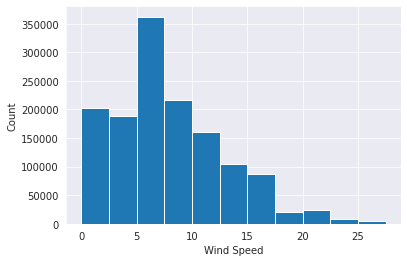

In [53]:
plt.hist(df['Wind_Speed(mph)'], bins=np.arange(0,30,2.5))
plt.xlabel('Wind Speed')
plt.ylabel('Count');

As we can see the most of the accidents have occured when the wind speed was in range of `0 to 10 miles per hour`.

Further `5` to `7.5` range have maximum number of accidents.

## Summary & Conclusion

Insights:
- Top 5 states with highest accidents are `California`, `Florida`, `Oregon`, `Texas` and `New York`.
- Less than `3%` of cities have more than `1000` accidents.
- Over `1100` cities have reported just 1 accident.(need to investigate)
- Major chunk of the data for number of accidents ranges from `0` to `100` accidents.
- The number of accidents per city decreases exponentially.
- A high percentage of accidents occur between `3 PM` to `6 PM` and `6 AM` to `8 AM` which could probably due to people commuting to work and home.
- Most accidents occur during `wind speed` in range of `0 to 10 miles per hour`.

In [54]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ··········
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/rushabhgajjar/us-accidents-analysis


'https://jovian.ai/rushabhgajjar/us-accidents-analysis'